# Hopfield Networks 2

Use Hopfield networks to recall simple distorted images.

In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.hopfield_network import HopfieldNetwork
from ann.plotting import subplots

# Load Images

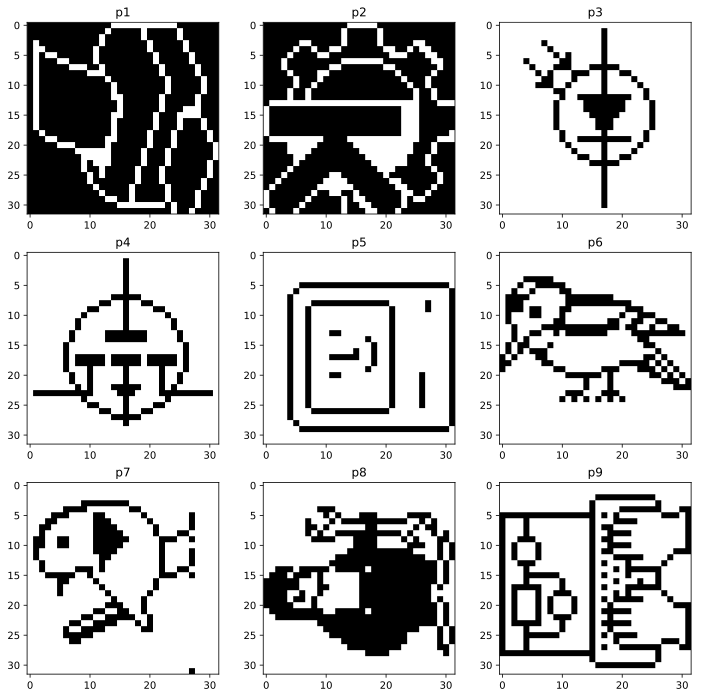

In [2]:
pict = np.genfromtxt('../data/pict.dat', delimiter=',', dtype=np.int8).reshape(11, 1024)

_, axes = subplots(3, 3)

for i, (img, ax) in enumerate(zip(pict[:9, :], axes.flatten())):
    ax.imshow(img.reshape(32, 32), cmap='gray')
    ax.set_title("p{}".format(i + 1))
    
plt.savefig('../figures/images.svg')

# Train Network

In [3]:
model = HopfieldNetwork()

model.train(pict[:3, :]);

# Recall Degraded Images

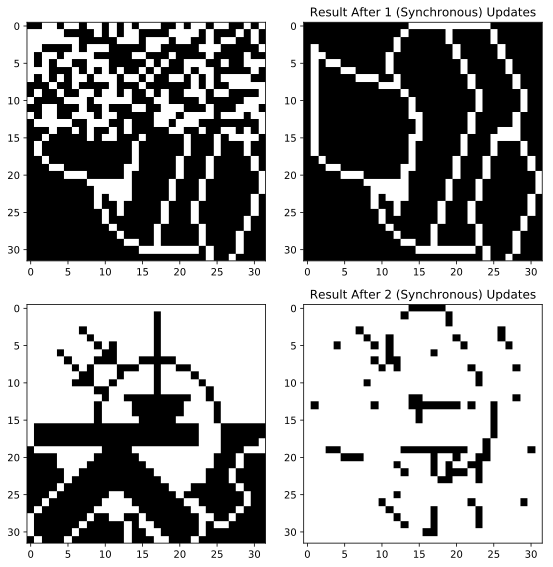

In [4]:
_, ((ax10, ax10_corr), (ax11, ax11_corr)) = subplots(2, 2)

ax10.imshow(pict[9, :].reshape(32, 32), cmap='gray')

p10_recalled, p10_iterations = model.recall(
    pict[9, :], synchronous=True, return_iterations=True)

ax10_corr.imshow(p10_recalled.reshape(32, 32), cmap='gray')

fmt = "Result After {} (Synchronous) Updates"
ax10_corr.set_title(fmt.format(p10_iterations))

p11_recalled, p11_iterations = model.recall(
    pict[10, :], synchronous=True, return_iterations=True)

ax11.imshow(pict[10, :].reshape(32, 32), cmap='gray')
ax11_corr.imshow(model.recall(pict[10, :]).reshape(32, 32), cmap='gray')

fmt = "Result After {} (Synchronous) Updates"
ax11_corr.set_title(fmt.format(p11_iterations))

plt.tight_layout()

plt.savefig('../figures/recall_images.svg')

# Select Units Randomly

In [5]:
def sequential_series(pattern, iterations):
    _, axes = subplots(1, len(iterations))

    current_iteration = 0
    for i, ax in zip(iterations, axes):
        pattern_ = pattern
        for _ in range(current_iteration, i):
            pattern_ = model.update(pattern_, synchronous=False)

        pattern = pattern_

        ax.imshow(pattern.reshape(32, 32), cmap='gray')
        ax.set_title("{} Iterations".format(i))

        current_iteration = i

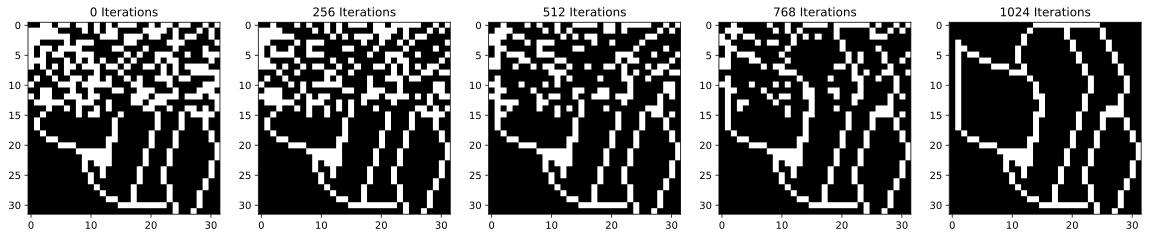

In [6]:
sequential_series(pict[9, :], iterations=range(0, 1025, 256))

plt.savefig('../figures/random_units_p10.svg')

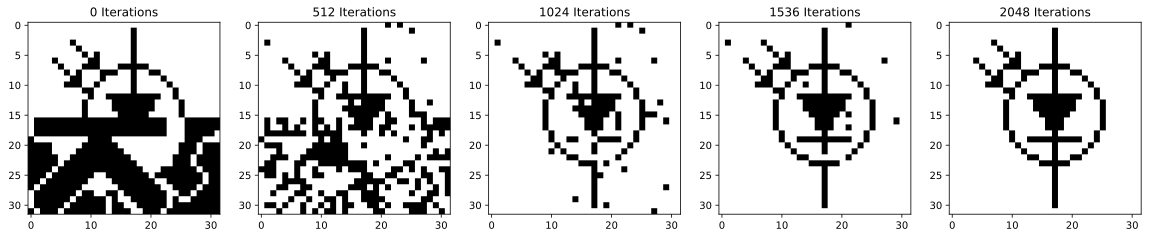

In [7]:
sequential_series(pict[10, :], iterations=range(0, 2049, 512))

plt.savefig('../figures/random_units_p11.svg')